In [24]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Normalization,Dense

In [4]:
data = pd.read_csv("train.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [6]:
data.shape

(1000, 12)

Visualizing how each of them are related to each other using seaborn library

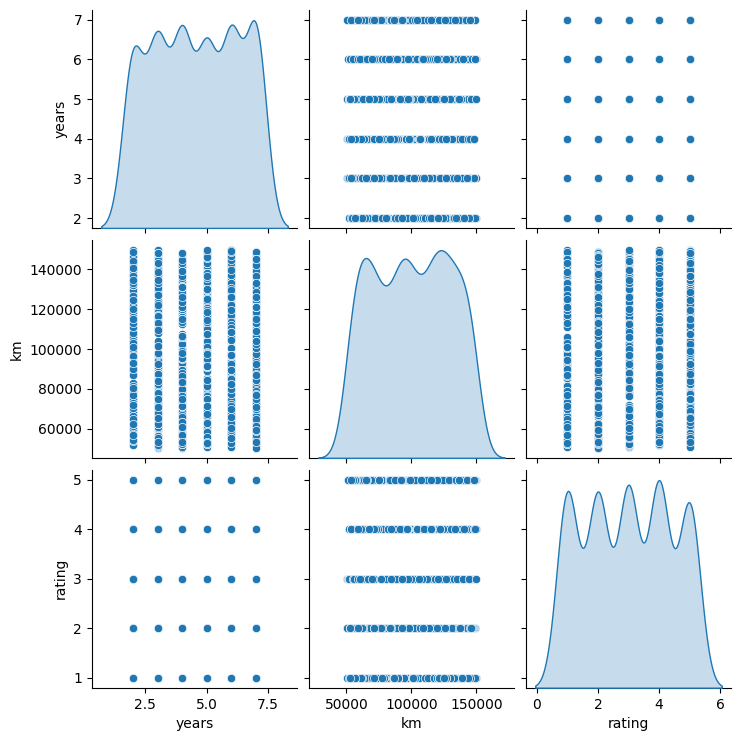

In [8]:
sns.pairplot(data[["years","km","rating"]],diag_kind="kde") #kde=kernel density estimate

In [11]:
#converting to tensor
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data,tf.float32)
print(tensor_data[:5])

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 3.000000e+00 7.894500e+04
  1.000000e+00 2.000000e+00 1.400000e+01 1.770000e+02 7.300000e+01
  1.230000e+02 3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 6.000000e+00 1.172200e+05
  5.000000e+00 9.000000e+00 9.000000e+00 1.480000e+02 7.400000e+01
  9.500000e+01 2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 2.000000e+00 1.325380e+05
  2.000000e+00 8.000000e+00 1.500000e+01 1.810000e+02 5.300000e+01
  9.700000e+01 2.153860e+05]
 [4.000000e+00 5.739990e+05 7.223810e+05 4.000000e+00 1.010650e+05
  4.000000e+00 3.000000e+00 1.100000e+01 1.970000e+02 5.400000e+01
  1.160000e+02 2.442955e+05]
 [5.000000e+00 6.913880e+05 8.113350e+05 6.000000e+00 6.155900e+04
  3.000000e+00 9.000000e+00 1.200000e+01 1.600000e+02 5.300000e+01
  1.050000e+02 5.311145e+05]], shape=(5, 12), dtype=float32)


In [12]:
#shuffling to eliminate bias
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[6.910000e+02 6.342340e+05 8.823930e+05 4.000000e+00 1.157600e+05
  1.000000e+00 4.000000e+00 1.500000e+01 1.450000e+02 5.100000e+01
  1.380000e+02 2.955535e+05]
 [8.340000e+02 5.021310e+05 8.073830e+05 5.000000e+00 1.254500e+05
  2.000000e+00 3.000000e+00 1.500000e+01 1.880000e+02 1.190000e+02
  7.700000e+01 1.518365e+05]
 [3.730000e+02 5.657190e+05 7.670520e+05 3.000000e+00 6.529300e+04
  4.000000e+00 4.000000e+00 1.000000e+01 1.930000e+02 1.050000e+02
  6.900000e+01 4.063495e+05]
 [7.850000e+02 5.519650e+05 8.349980e+05 4.000000e+00 9.713200e+04
  5.000000e+00 5.000000e+00 1.000000e+01 1.380000e+02 8.200000e+01
  8.800000e+01 3.077705e+05]
 [5.540000e+02 6.331980e+05 8.604230e+05 3.000000e+00 1.472820e+05
  3.000000e+00 8.000000e+00 1.400000e+01 1.690000e+02 1.010000e+02
  1.060000e+02 1.743525e+05]], shape=(5, 12), dtype=float32)


In [15]:
#getting what we need
X = tensor_data[:,3:-1] # because we dont need first three columns
print(X.shape)

(1000, 8)


In [16]:
y= tensor_data[:,-1]
print(y[:5].shape)
y=tf.expand_dims(y,axis=-1)
print(y[:5])

(5,)
tf.Tensor(
[[295553.5]
 [151836.5]
 [406349.5]
 [307770.5]
 [174352.5]], shape=(5, 1), dtype=float32)


In [20]:
normalizer = Normalization()
x_normalized = tf.constant([[3,2,4,5,4],
                          [1,3,4,5,3],
                          [3,4,2,4,3]])
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.7071069 , -1.2247448 ,  0.7071069 ,  0.7071071 ,  1.4142138 ],
       [-1.4142135 ,  0.        ,  0.7071069 ,  0.7071071 , -0.70710665],
       [ 0.7071069 ,  1.2247448 , -1.4142135 , -1.4142132 , -0.70710665]],
      dtype=float32)>

In [21]:
normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.32650065,  0.531495  , -1.4178829 , -0.5639318 ,  1.5138373 ,
        -1.135604  , -1.6358571 ,  1.6427546 ],
       [ 0.25549707,  0.8640745 , -0.7046621 , -0.9181603 ,  1.5138373 ,
         1.0948331 ,  1.6801356 , -1.2553575 ],
       [-0.9084984 , -1.2006301 ,  0.7217795 , -0.5639318 , -0.72888464,
         1.3541863 ,  0.9974312 , -1.6354377 ],
       [-0.32650065, -0.107854  ,  1.4350003 , -0.20970328, -0.72888464,
        -1.4986984 , -0.12415455, -0.7327471 ],
       [-0.9084984 ,  1.613391  ,  0.00855871,  0.8529823 ,  1.065293  ,
         0.10929114,  0.8023728 ,  0.12243352]], dtype=float32)>

CREATING THE MODEL

In [26]:
model = tf.keras.Sequential([
    normalizer,
    Dense(1)
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (1000, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)